In [51]:
#Import libraries needed for work with data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn import preprocessing
%matplotlib inline

In [52]:
#Create tran and test dataframes from csv files. df - training dataframe, df_test - test dataframe. Fill Nan values with mean()
#Drop index column. Parse dataframe to two frames for white and red wine (df_red and df_white correspondenly). Y = 
filename = 'WINE.csv'
test_file = 'TEST.csv'
df = pd.read_csv(filename)
df.fillna(df.mean(), inplace = True)
df_test = pd.read_csv(test_file)
df_test.fillna(df_test.mean(), inplace = True)
df.drop('Index', axis = 1, inplace = True)

df_red = df.loc[df['Type'] == 'red_wine']
df_white = df.loc[df['Type'] == 'white_wine']

#Ceate test sets for red and whit wine
df_red_t = df_test.loc[df_test['Type'] == 'red_wine']
df_white_t = df_test.loc[df_test['Type'] == 'white_wine']
red_index = list(df_red_t['Index'])
white_index = list(df_white_t['Index'])
#red_index and white_index - lists with index corresponding to training examples for red and white wine. Needed to add it 
#at the end to submission file

   Most Correlated Features
0                    Target
1                   Alcohol
2                         S
3                         C
4                         A
5                         E
6                  Nitrogen
7                     Sugar
8                         V
9                   Density
10                       Di
11                       pH
12                        D
13                        H
14                        U
15                        B


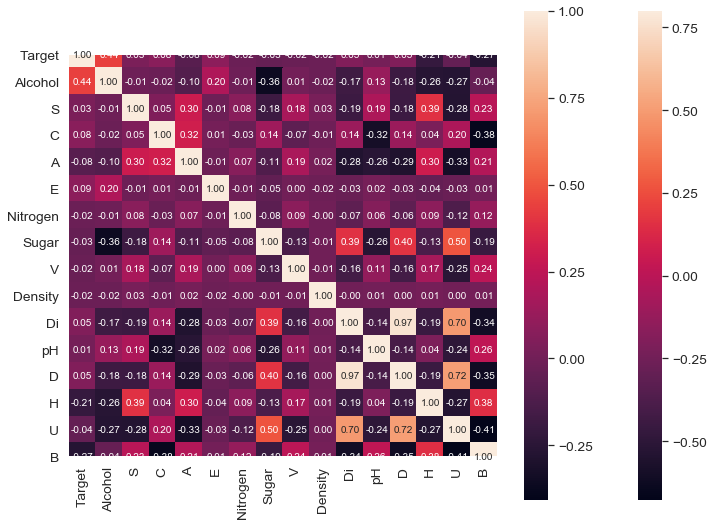

In [10]:
#Analyzing all features in set and investigate correlation between Target and other features. Investigating red_wine dataframe
corrmat = df_red.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)
k = 18 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Target')['Target'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
most_corr = pd.DataFrame(cols)
most_corr.columns = ['Most Correlated Features']
print(most_corr)


   Most Correlated Features
0                    Target
1                   Alcohol
2                        pH
3                         E
4                         S
5                         V
6                         D
7                        Di
8                  Nitrogen
9                         C
10                  Density
11                    Sugar
12                        A
13                        U
14                        B
15                        H


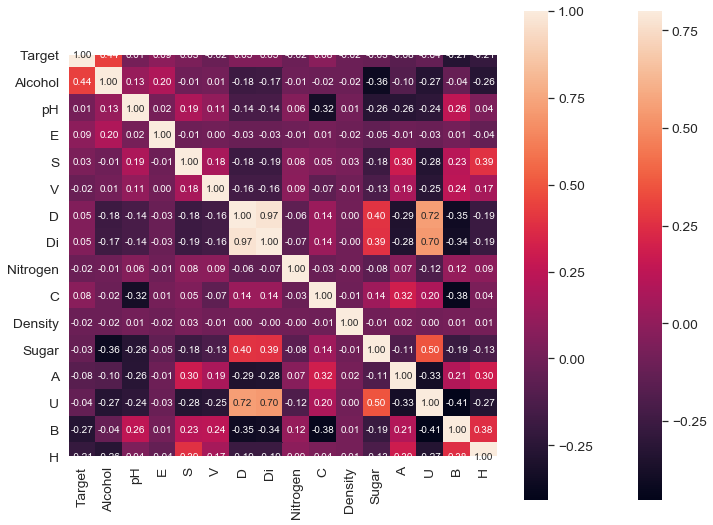

In [53]:
#Analyzing all features in set and investigate correlation between Target and other features. Investigating white_wine dataframe
corrmat = df_white.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)
k = 18 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Target')['Target'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
most_corr = pd.DataFrame(cols)
most_corr.columns = ['Most Correlated Features']
print(most_corr)

In [54]:
#Use Pearson correlation factor as metric fo correlation
print(df_red.corr(method='pearson'))
print(df_white.corr(method='pearson'))

            Target   Alcohol   Density  Nitrogen        pH     Sugar  \
Target    1.000000  0.476540 -0.025817  0.015097 -0.049817  0.010884   
Alcohol   0.476540  1.000000 -0.035925  0.015674  0.204920  0.039885   
Density  -0.025817 -0.035925  1.000000 -0.006466 -0.025487  0.035075   
Nitrogen  0.015097  0.015674 -0.006466  1.000000  0.015531  0.012753   
pH       -0.049817  0.204920 -0.025487  0.015531  1.000000 -0.084259   
Sugar     0.010884  0.039885  0.035075  0.012753 -0.084259  1.000000   
A         0.114189 -0.064107  0.018756  0.002367 -0.677682  0.118874   
B        -0.380140 -0.193906  0.016562 -0.017145  0.233523 -0.001679   
C         0.201509  0.092679  0.004285  0.022871 -0.529985  0.146324   
D        -0.058933 -0.065716  0.041852  0.038354  0.063310  0.174100   
Di       -0.041209 -0.063801  0.031447  0.043160  0.069027  0.171208   
E         0.079920  0.186262 -0.002964 -0.001841  0.025481  0.003065   
H        -0.129306 -0.221768  0.039198 -0.009411 -0.266599  0.05

In [55]:
#In this case i'll use the most correlated features in a model. I'll drop all features with absolute value of correlation factor
#less than 0.1. Five features have factor with appropriate value - Alcohol, A, B, H, U. I'll use it in model.
#Select needed columns and create train (df_red and df_white) and test (df_red_t and df_white_t) sets. 
#Y_red and Y_white - true labels for red and white wine
df_red = df_red[['Alcohol','Target', 'A', 'B', 'H', 'U']]
df_white = df_white[['Alcohol','Target', 'A', 'B', 'H', 'U']]
df_red_t = df_red_t[['Alcohol', 'A', 'B', 'H', 'U']]
df_white_t = df_white_t[['Alcohol', 'A', 'B', 'H', 'U']]
Y_red = np.array(df_red['Target'].astype('float64')).reshape(len(df_red['Target']),1)
Y_white = np.array(df_white['Target'].astype('float64')).reshape(len(df_white['Target']),1)
df_red.drop('Target', axis = 1, inplace = True)
df_white.drop('Target', axis = 1, inplace = True)

In [56]:
frames = [df_red, df_red_t, df_white, df_white_t]
X_red = pd.DataFrame()
X_red_t = pd.DataFrame() 
X_white = pd.DataFrame()
X_white_t = pd.DataFrame()
for i in range(len(frames)):
    x = frames[i].values 
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    frames[i] = pd.DataFrame(x_scaled)    
X_red = frames[0]
X_red_t = frames[1]
X_white = frames[2]
X_white_t = frames[3]

In [57]:
#As train and test frames for wines have a different shapes, to prevent problems with broadcasting i'll add rows with 0
#to test frame as examples. These rows will be dropped before submission of model.
zeros_red = np.zeros((X_red.shape[0]-X_red_t.shape[0],5))
zerosdf = pd.DataFrame(zeros_red)
X_red_t = X_red_t.append(zerosdf)
zeros_white = np.zeros((X_white.shape[0]-X_white_t.shape[0],5))
zerosdf = pd.DataFrame(zeros_white)
X_white_t = X_white_t.append(zerosdf)

In [59]:
#As we have the most correlated features, i'll use simple linear regression model.
#Function of initialization. Using He initialization for weights.
#Return a dictionary of weights and biases
def initialize(X):
    np.random.seed(2)
    parameters = {}
    parameters['W'] = np.random.randn(1,X.shape[1])*np.sqrt(2/X.shape[0])
    parameters['b'] = np.zeros((1,1))
    return parameters

In [60]:
#Forward propagation through model. Returns an output vector Z
def forward(X, parameters):
    #print(X.shape,parameters['W'].shape,parameters['b'])
    Z = np.dot(X,parameters['W'].T) + parameters['b']
    return Z

In [61]:
#Function for gradient descent calculation. Returns a dictionary of partial derivatives for Z (output), W (weights), b (biases)
def backprop(X,Y,Z):
    m = X.shape[0]    
    dZ = Z - Y
    dW = 1./m * np.dot(dZ.T, X)
    #print(dW.shape)
    db = 1./m * np.sum(dZ, axis=1, keepdims = True)
    gradients = {'dZ':dZ, 'dW': dW, 'db': db}
    return gradients

In [62]:
#Function that update parameters by partial derivatives during gradient descent. Returns updated wetights and biases
def update_parameters(parameters, gradients, learning_rate):
    parameters['W'] = parameters['W'] - learning_rate*gradients['dW']
    parameters['b'] = parameters['b'] - learning_rate*gradients['db']
    return parameters

In [32]:
#cost_function calculates average error on output. I use standard deviation error. A3 is an output of network, Y - array of 
#answers
def cost_function(Z,Y):
    m = Y.shape[0]
    cost = 1./m * np.sum((Z-Y)**2)
    return cost

#Predictions funcrion returns a vector of predictions. Values are rounded to integer with built-in Python round method.
def predict(X,parameters):
    Z = forward(X,parameters)
    prediction = np.round((Z))
    return prediction

In [63]:
#Assembling our model. Takes X - input aarray, X_test - input test array, Y - target values, learning_rate and num_iterations - 
#network hyperparameters. Returns 5 argumens. [0] - prediction_test - array of predicted values of scores for test set.
#[1] - number of true predicted score for training set. [2] - costs - a list of cost_function values. [3] - iterations - 
#list of number of iterations. [4] - labels - list of true predicted scores. 3 last lists are for plot cost_function per number
#of iterations and true labelled scores per number of iterations. This is for selecting network hyperparameters.
def model(X,X_test,Y,learning_rate, num_iterations):
    parameters = initialize(X)
    costs = []
    iterations = []
    labels = []
    for i in range(num_iterations+1):
        Z = forward(X,parameters)
        cost = cost_function(Z, Y)
        gradients = backprop(X,Y,Z)        
        parameters = update_parameters(parameters, gradients, learning_rate)
        if i%100 == 0:
            costs.append(cost)
            iterations.append(i)
            labels.append(np.sum(np.round((Z)) == (Y)))
    prediction_train = predict(X, parameters)    
    prediction_test = predict(X_test, parameters)
    print(max(labels), iterations[labels.index(max(labels))])
    return prediction_test, np.sum(prediction_train == Y), costs, iterations, labels

4228 10200


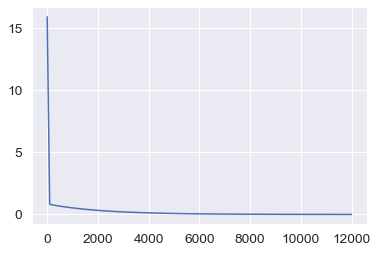

In [76]:
#Run model with learning rate 1.0 and 5000 iterations for white wine (set is bigger than for red). Save predictions 
#to dataframe and add indexes starting from 5600 #(as in submission file). Plot our cost function and number of true predicted 
#scores to obtain best number of iterations. Use indexes list to add indexes. Use slice of 591 example - the number of 
#test examples, dropping
answer = model(X_white,X_white_t,Y_white,1.0, 12000)
answer_white = answer[0][:591]
answ_white = pd.DataFrame(answer_white)
answ_white.index = white_index
y,x, labels = answer[2], answer[3], answer[4]
plt.plot(x,y)

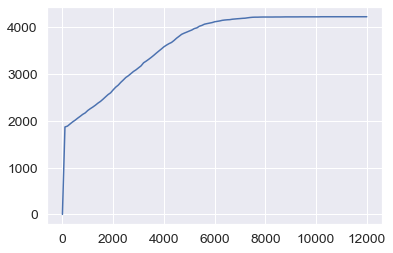

In [77]:
plt.plot(x,labels)

1372 3400


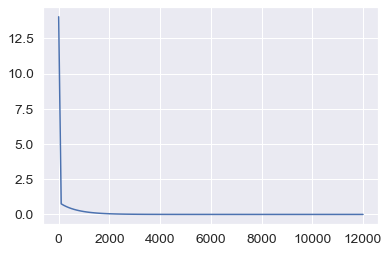

In [78]:
#Run model for red_wine
answer = model(X_red,X_red_t,Y_red,1.0, 12000)
answer_red = answer[0][:199]
answ_red = pd.DataFrame(answer_red)
answ_red.index = (red_index)
y,x, labels = answer[2], answer[3], answer[4]
plt.plot(x,y)

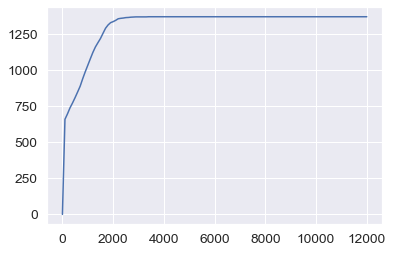

In [79]:
plt.plot(x,labels)

In [80]:
answ_white = answ_white.append(answ_red)
answ_white = answ_white.sort_index()
answ_white.columns = ['Target']
answ_white.index.names = ['Index']
answ_white.to_csv('Submission1.csv')
print(answ_white)

       Target
Index        
5600      6.0
5601      4.0
5602      6.0
5603      2.0
5604      6.0
...       ...
6385      5.0
6386      3.0
6387      4.0
6388      4.0
6389      5.0

[790 rows x 1 columns]


In [84]:
#As we see model works clearly on training sets. Actually number of iterations is bit excessive, as the cost function 
#value is near 0 after 5000 iterations. In training set for red wine all 1372 examples are true marked after 3400 iterations. 
#But for a white wine all examples are true marked after 10200 iterations. We can use value about 5000 or 6000 as pretty precise
#red and white wine test sets are assembled toghether and ordered by index in submission file.
#This model is looking much better than previous one (neural network), because works clearly with training set and gives 100%
#precision in training set. But it's maybe not a problem of neural network model, but problem of black box approach for features
#assessment. As a conclusion, i can say that 'Alcohol', 'A', 'B', 'H', 'U' - the major features for wine quality assessment in 
#this dataframe. Using this features in neural network model can lead to huge increasing of model precision